In [1]:
# Notebook creado por Martín Palazzo para la comisión de DS presencial Palermo 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importo librerias de Scikit Learn
Puntualmente nos interesa importar el modelo de Regresion Lineal, la medida de error cuadratico medio, y el divisor de datos entre train y test.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Importo dataset de paltas 
Desde Kaggle obtenemos el siguiente dataset para entrenar nuestros modelos de regresion https://www.kaggle.com/neuromusic/avocado-prices

In [3]:
pwd

'C:\\Users\\pc\\Cursos\\Data-Science\\Máshin Lénin\\Actividad Paltas'

In [4]:
# importo el dataset de properati, lo guardamos en el dataframe "palta".
palta = pd.read_csv('avocado.csv', delimiter=',', parse_dates=["Date"])

In [5]:
palta.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
# eliminamos la columna "Unnamed: 0"
del palta['Unnamed: 0']

In [7]:
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Ordenamos nuestr dataframe de manera creciente por fecha (previamente realizamos parse sobre el campo fechas al importar el dataset)

In [11]:
# ordenamos nuestro dataframe de manera creciente por fecha
palta = palta.sort_values("Date")

In [12]:
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


Convertimos nuestras fechas a numeros con la funcion "toordinal" de pandas.

In [13]:
# transformo mi columna Date de mi dataframe a numeros, las fechas pueden expresarse con numeros.
import datetime as dt
palta['Date']=palta['Date'].map(dt.datetime.toordinal)

In [14]:
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,735602,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,735602,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,735602,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,735602,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,735602,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


# Genero un nuevo dataframe con los datos de la región de chicago y palta convencional

In [15]:
palta.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [16]:
palta_conv_chicago = palta[(palta.type == 'conventional') & (palta.region == 'Chicago')]

In [17]:
palta_conv_chicago.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
467,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
466,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
465,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago
464,735623,1.22,745439.17,26117.56,488218.44,145882.24,85220.93,75867.61,9265.81,87.51,conventional,2015,Chicago
463,735630,0.91,1133491.66,50783.91,824745.44,164884.41,93077.90,89516.93,3448.62,112.35,conventional,2015,Chicago


In [18]:
np.shape(palta_conv_chicago)

(169, 13)

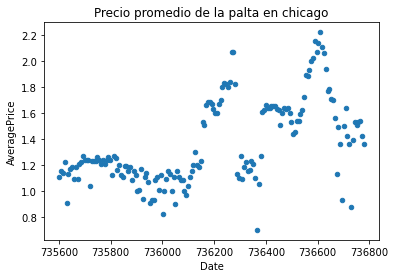

In [19]:
# ploteo todos mis datos de chicago
palta_conv_chicago.plot(x='Date', y='AveragePrice', kind="scatter")
plt.title("Precio promedio de la palta en chicago")
plt.show()

# Separo de mis datos las variables independientes (x)
Considero como variable independiente la fecha.

In [20]:
x_ch = palta_conv_chicago.Date

# Separo de mis datos la variable dependiente (y) 
Considero la variable independiente el precio promedio de los avocados

In [21]:
y_ch = palta_conv_chicago.AveragePrice

In [22]:
palta_conv_chicago.index

Int64Index([ 467,  466,  465,  464,  463,  462,  461,  460,  459,  458,
            ...
            8583, 8582, 8581, 8580, 8579, 8578, 8577, 8576, 8575, 8574],
           dtype='int64', length=169)

In [23]:
y_ch.head()

467    1.11
466    1.15
465    1.14
464    1.22
463    0.91
Name: AveragePrice, dtype: float64

# De mi dataset (chicago), separo train y test set
Utilizando la funcion de scikit learn "train_test_split" separo mis datos. Podemos seleccionar el tamaño del test size (test_size + train_size = 1). El random state es un parametro para mezclar los datos aleatoriamente del dataset en cuestion.

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x_ch, y_ch, test_size=0.5, random_state=42)

In [26]:
ytrain.head()

3243    1.67
428     1.18
3233    1.84
3241    1.60
6084    1.61
Name: AveragePrice, dtype: float64

In [27]:
xtrain.head()

3243    736190
428     735875
3233    736260
3241    736204
6084    736386
Name: Date, dtype: int64

In [28]:
type(xtrain)

pandas.core.series.Series

Como inicialmente mis datos estan en formato DataFrame y Series de Pandas, y scikit learn me solicita utilizar arrays de numpy con dimensiones equivalentes a [numero de samples, numero de features], transformo mis datos con estos requisitos.

In [29]:
np.shape(xtrain)

(84,)

In [30]:
xtrain = np.array(xtrain)

In [31]:
xtrain = np.reshape(xtrain,(np.shape(xtrain)[0],1))

In [32]:
type(xtrain)

numpy.ndarray

In [33]:
np.shape(xtrain)

(84, 1)

In [34]:
xtest = np.reshape(np.array(xtest), (np.shape(xtest)[0],1))

In [35]:
np.shape(xtest)

(85, 1)

In [36]:
ytest = np.reshape(np.array(ytest), (np.shape(ytest)[0],1))

In [37]:
ytrain = np.reshape(np.array(ytrain), (np.shape(ytrain)[0],1))

# Implementar modelo de Regresion Lineal
Con el Train set ajustaremos el modelo de Regresion Lineal, para luego determinar la performance de mi modelo con el Test set.

In [38]:
# 1) creo un modelo generico de regresion lineal
lr = LinearRegression()

In [39]:
# 2) Ajusto el modelo de regresion lineal utilizando el set de train, tanto las features X como las samples Y
lr.fit(xtrain, ytrain)

LinearRegression()

In [40]:
# 3) Obtengo las predicciones que realiza mi modelo con las muestras de test, sin mostrarle las labels (Ytest)
ypred = lr.predict(xtest)

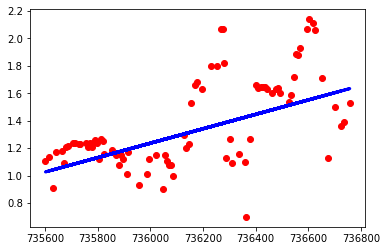

In [41]:

plt.scatter(xtest, ytest,  color='red')
plt.plot(xtest, ypred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [42]:
ypredtrain = lr.predict(xtrain)

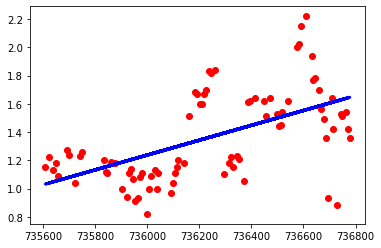

In [43]:
plt.scatter(xtrain, ytrain,  color='red')
plt.plot(xtrain, ypredtrain, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [44]:
mean_squared_error(ytrain, ypredtrain)

0.0685148962613347

In [45]:
mean_squared_error(ytrain, ypredtrain)

0.0685148962613347